This notebook is for visualizing the new TF-Modisco results for ZF4 from CTCF.

In [1]:
# Import necessary dependencies

%matplotlib inline
from __future__ import division;
from __future__ import print_function;
import numpy as np
import modisco
import sys
print (sys.version)
import os

TF-MoDISco is using the TensorFlow backend.


2.7.15 |Anaconda custom (64-bit)| (default, Dec 14 2018, 19:04:19) 
[GCC 7.3.0]


Save and print the results.

Metaclusters heatmap


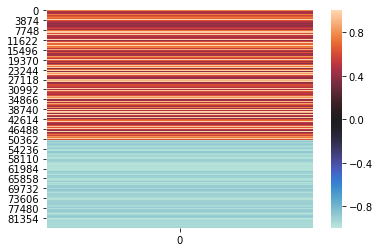

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 2550
Task 0 hypothetical scores:


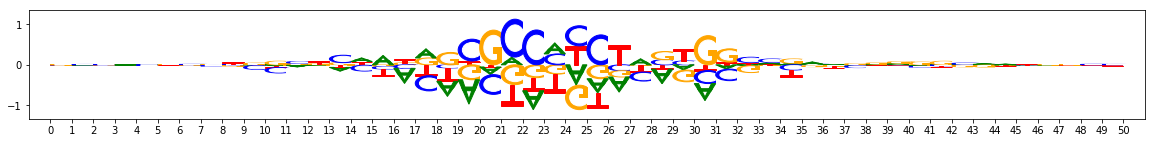

Task 0 actual importance scores:


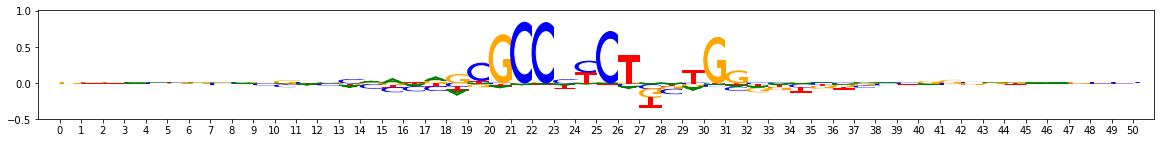

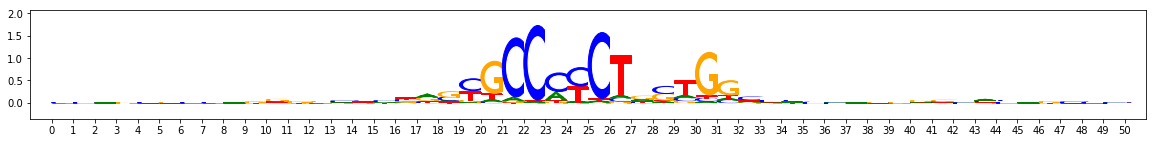

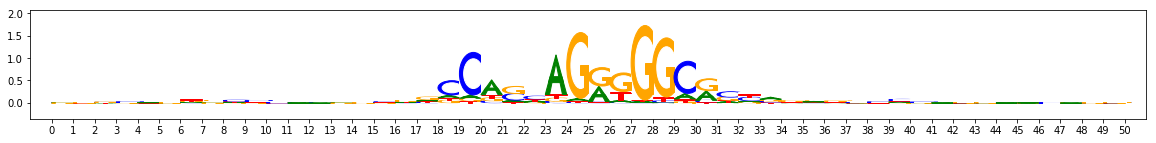

metacluster_0 pattern_1
total seqlets: 88
Task 0 hypothetical scores:


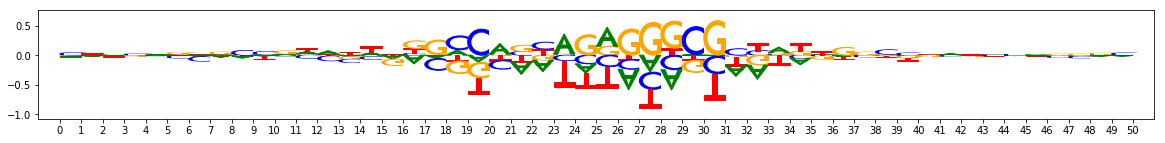

Task 0 actual importance scores:


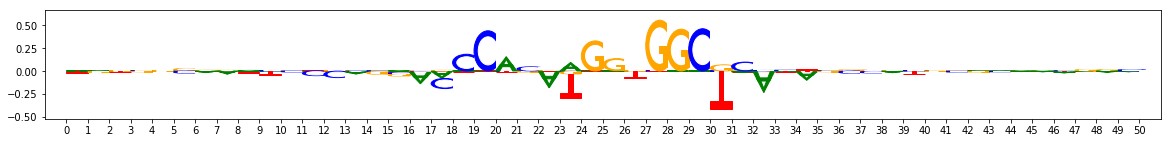

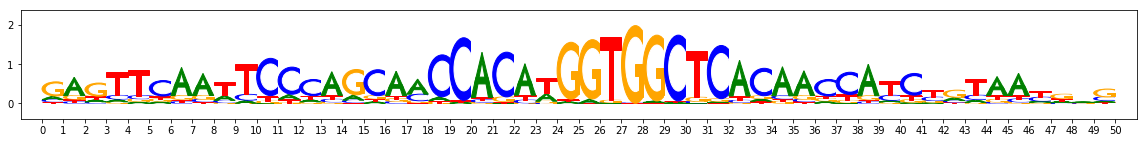

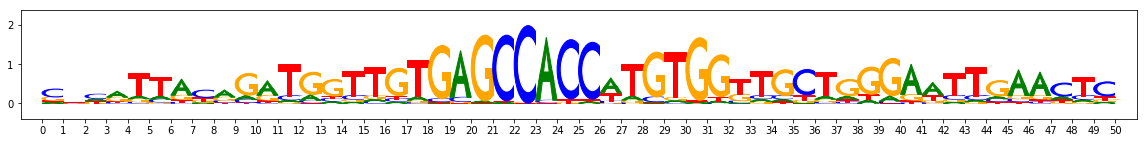

metacluster_0 pattern_2
total seqlets: 49
Task 0 hypothetical scores:


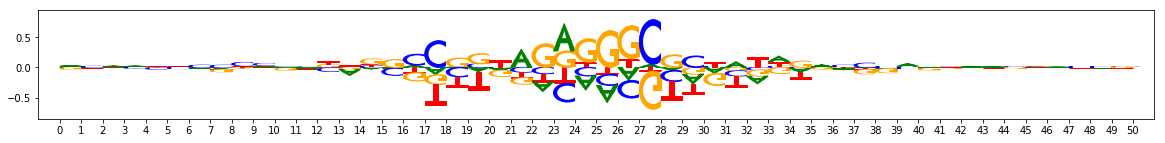

Task 0 actual importance scores:


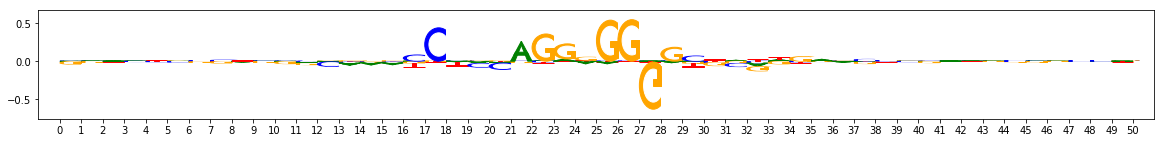

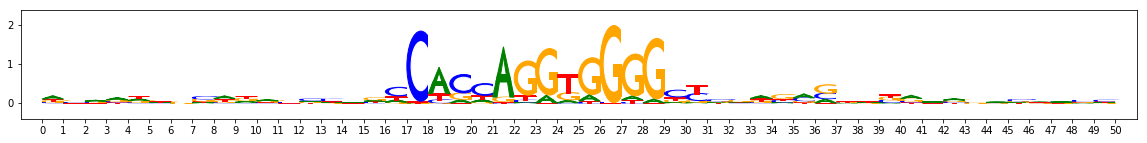

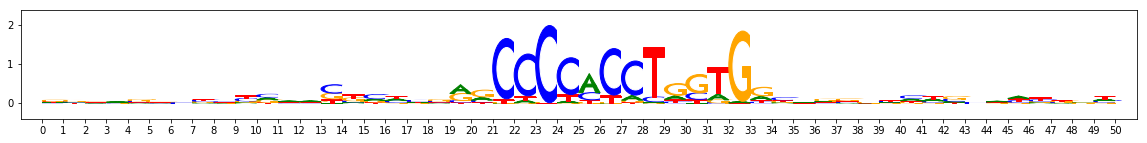

metacluster_0 pattern_3
total seqlets: 35
Task 0 hypothetical scores:


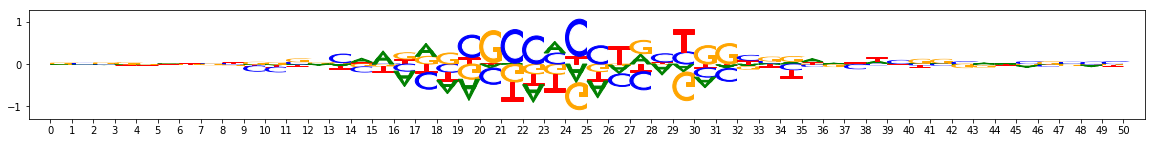

Task 0 actual importance scores:


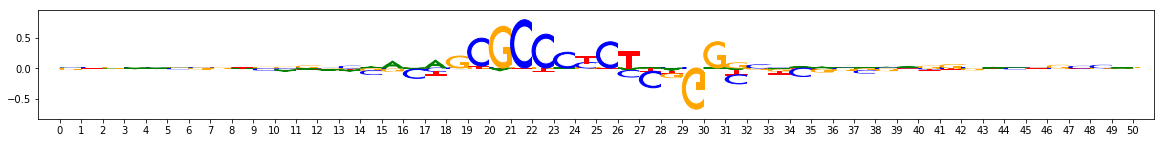

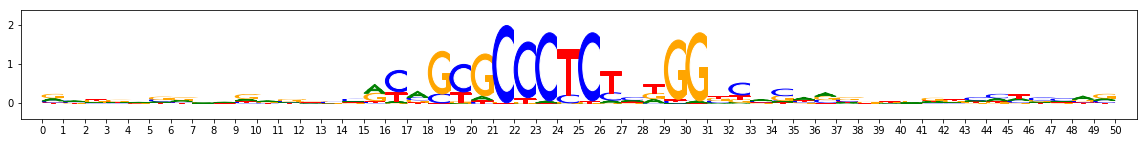

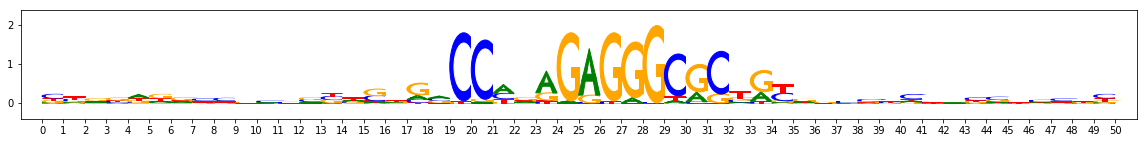

metacluster_1
activity pattern: [-1]
metacluster_1 pattern_0
total seqlets: 1010
Task 0 hypothetical scores:


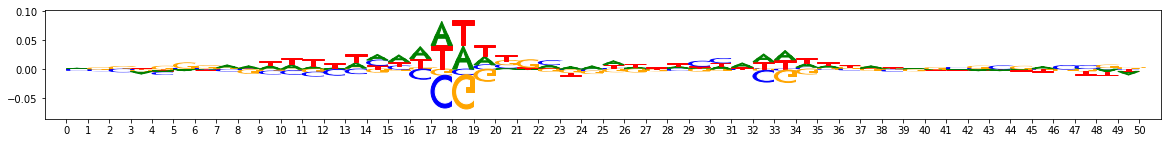

Task 0 actual importance scores:


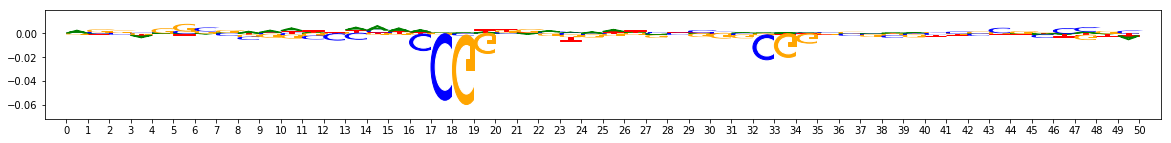

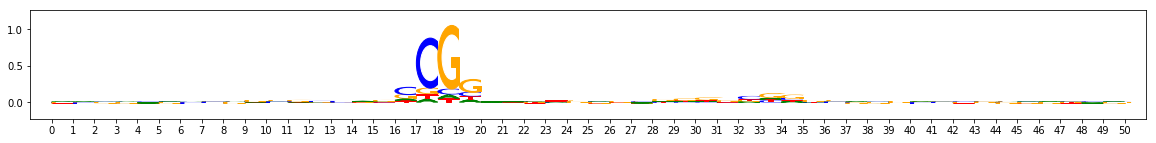

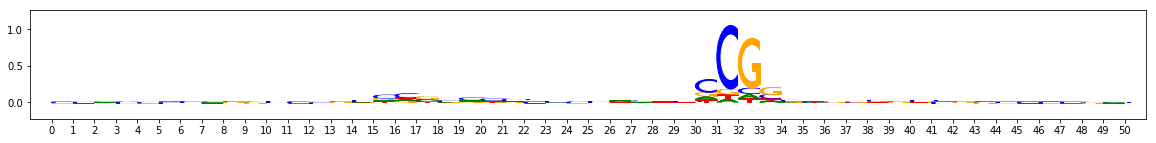

metacluster_1 pattern_1
total seqlets: 508
Task 0 hypothetical scores:


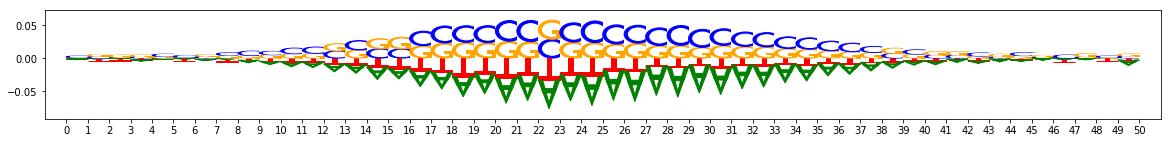

Task 0 actual importance scores:


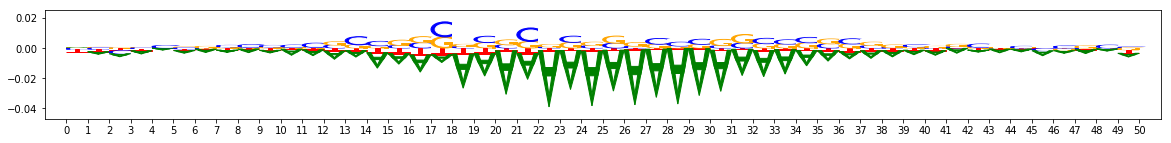

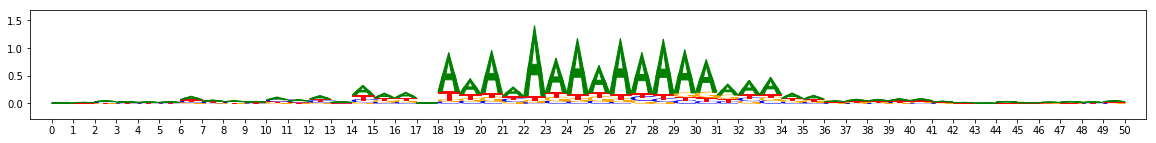

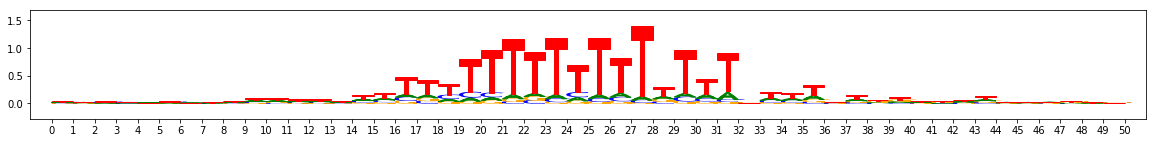

metacluster_1 pattern_2
total seqlets: 441
Task 0 hypothetical scores:


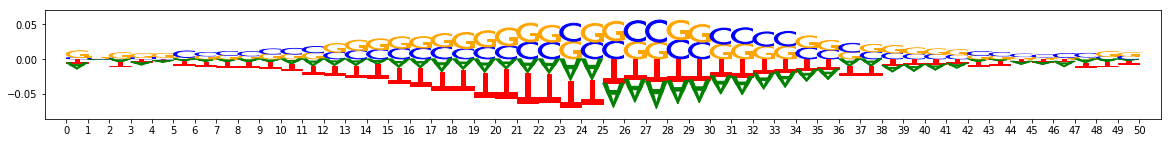

Task 0 actual importance scores:


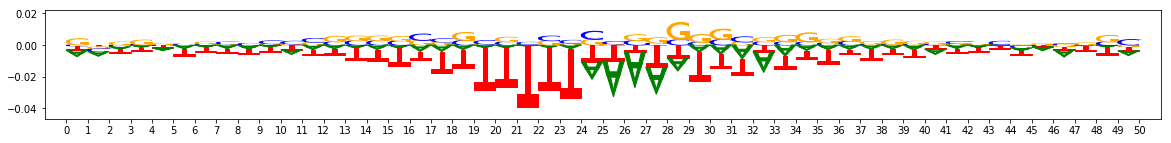

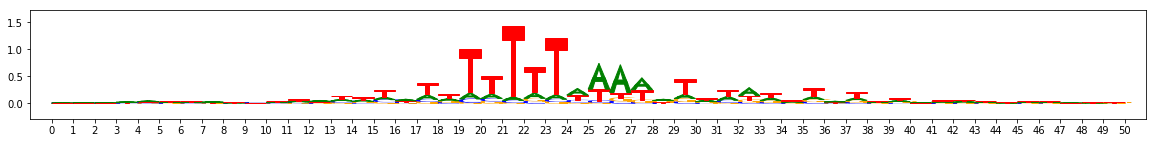

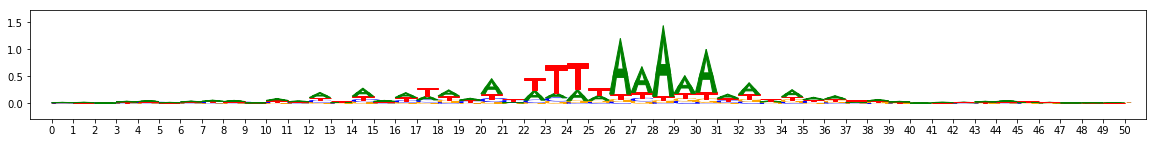

metacluster_1 pattern_3
total seqlets: 289
Task 0 hypothetical scores:


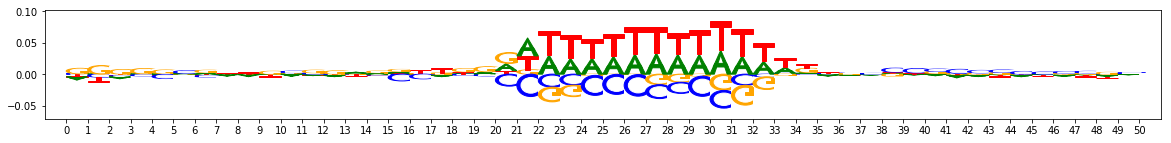

Task 0 actual importance scores:


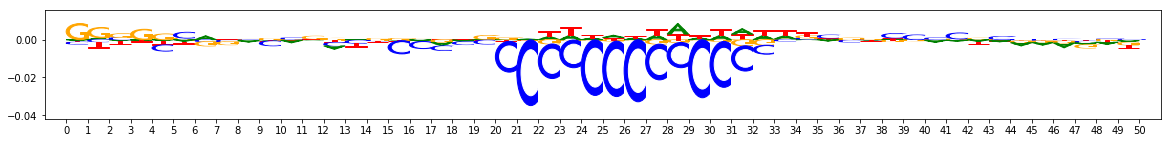

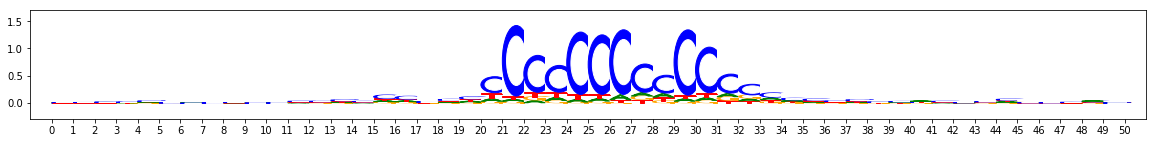

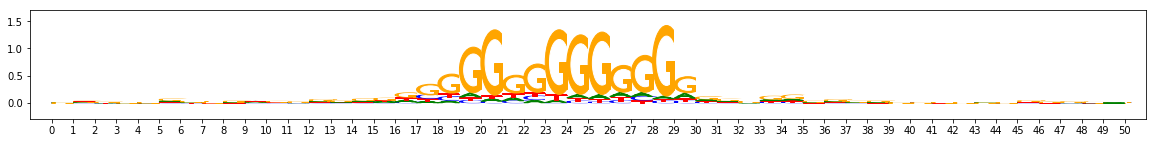

metacluster_1 pattern_4
total seqlets: 91
Task 0 hypothetical scores:


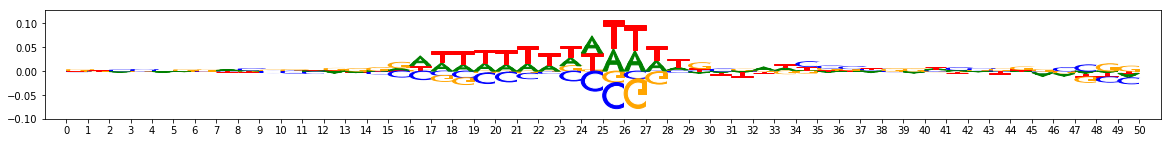

Task 0 actual importance scores:


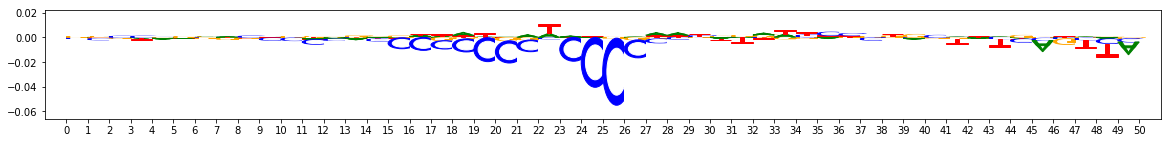

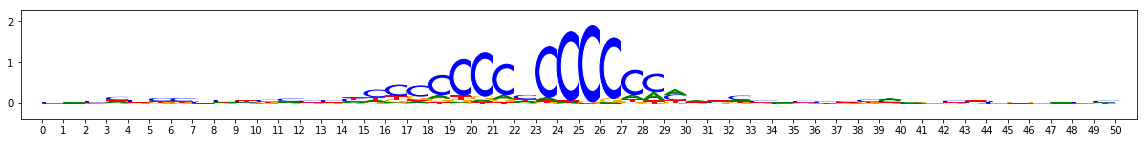

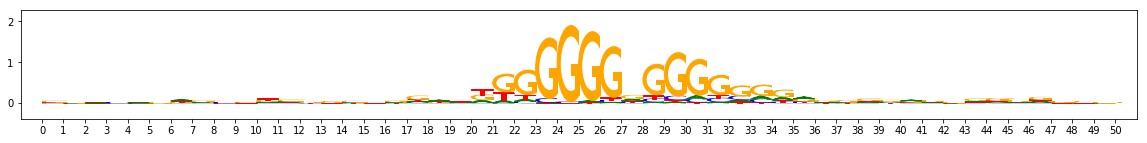

metacluster_1 pattern_5
total seqlets: 60
Task 0 hypothetical scores:


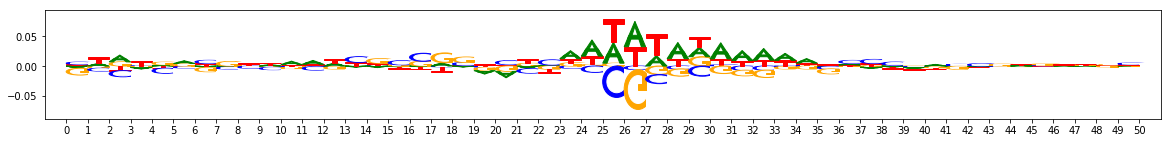

Task 0 actual importance scores:


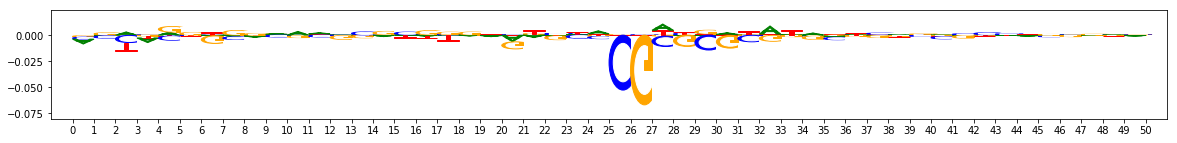

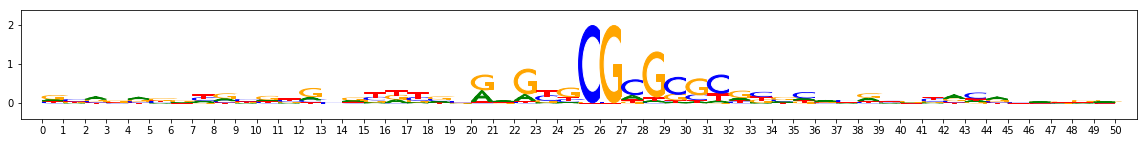

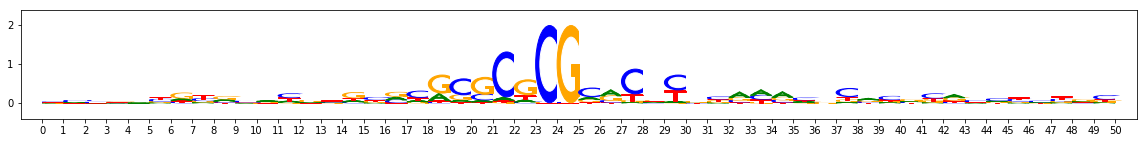

metacluster_1 pattern_6
total seqlets: 48
Task 0 hypothetical scores:


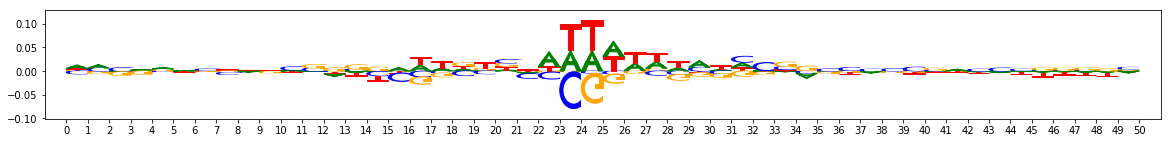

Task 0 actual importance scores:


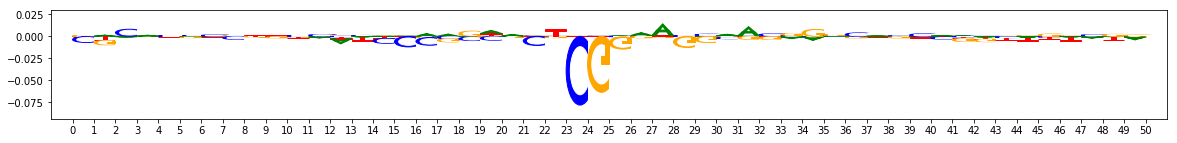

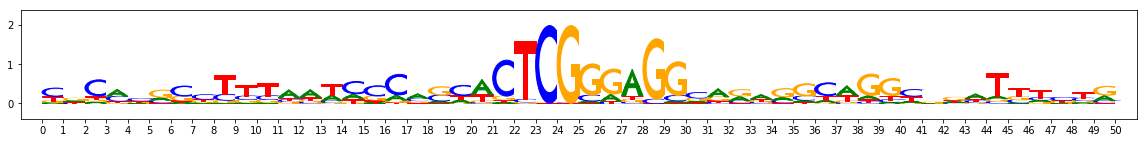

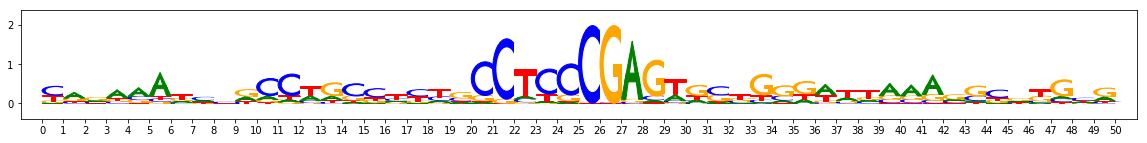

metacluster_1 pattern_7
total seqlets: 44
Task 0 hypothetical scores:


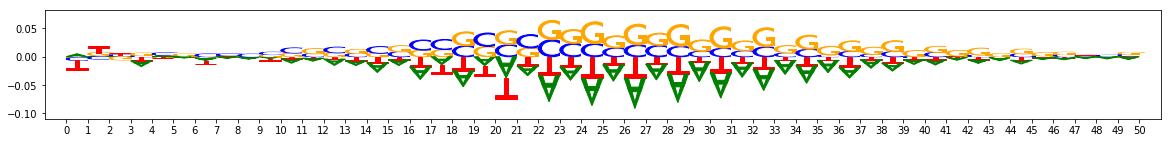

Task 0 actual importance scores:


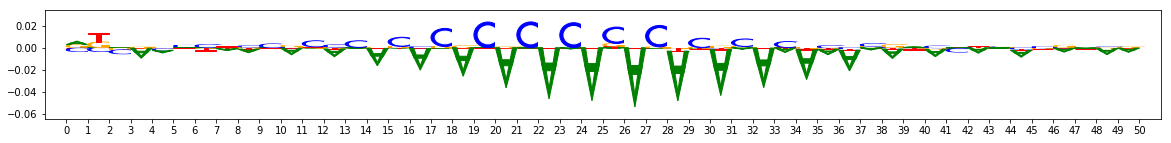

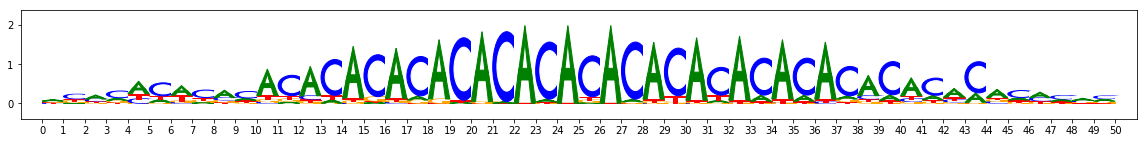

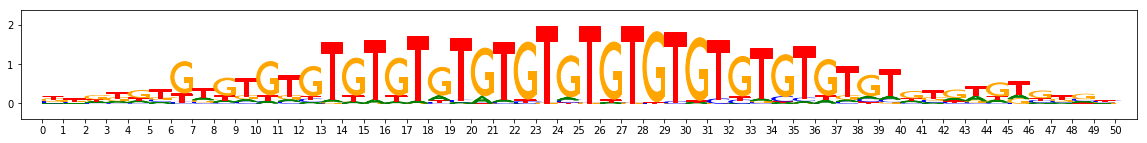

metacluster_1 pattern_8
total seqlets: 42
Task 0 hypothetical scores:


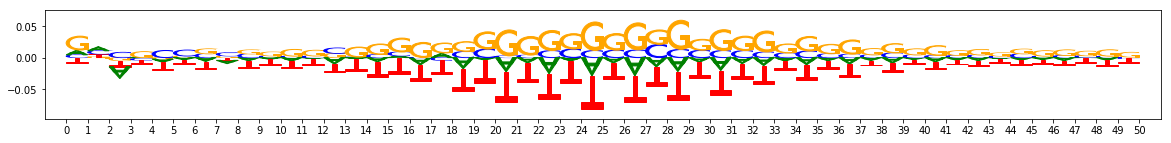

Task 0 actual importance scores:


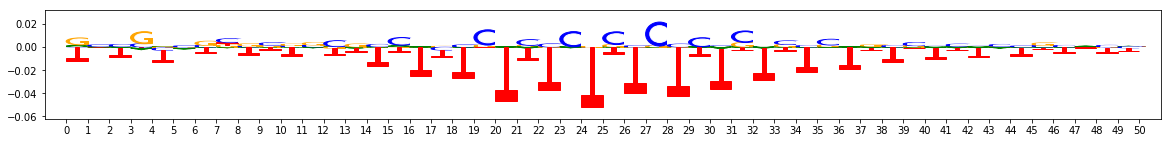

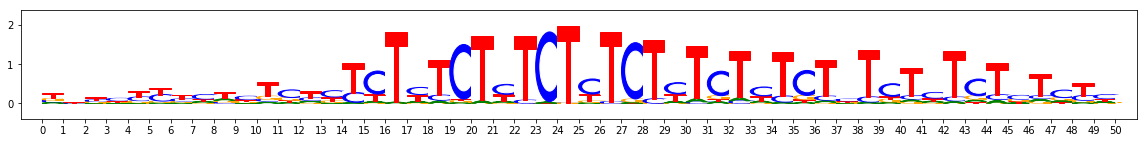

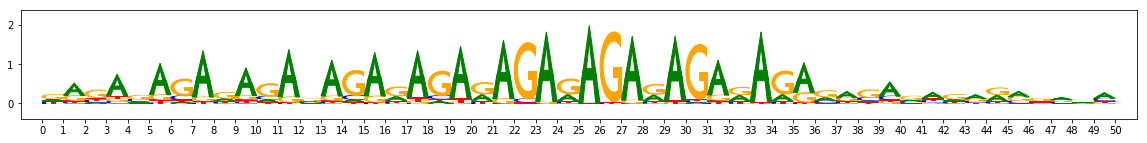

metacluster_1 pattern_9
total seqlets: 38
Task 0 hypothetical scores:


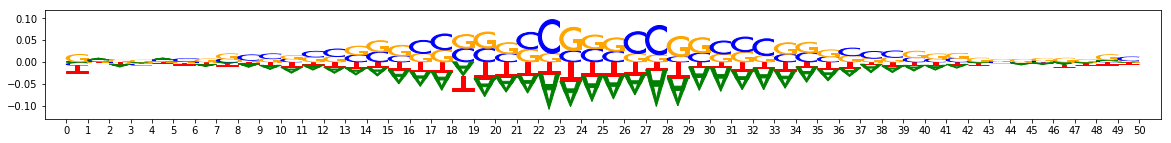

Task 0 actual importance scores:


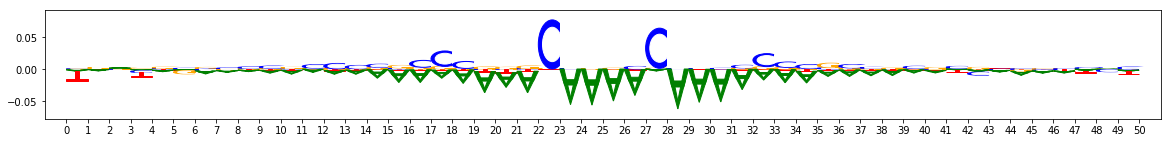

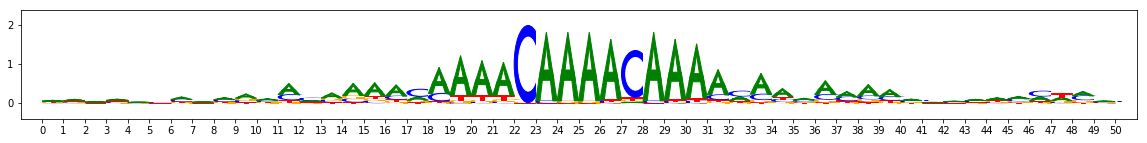

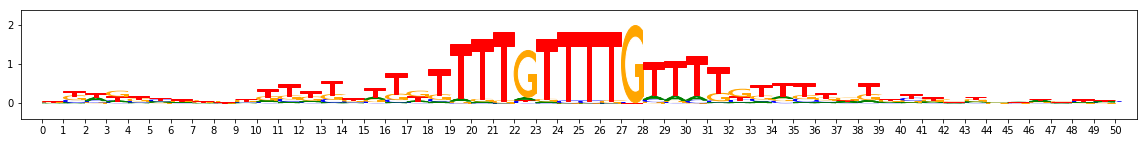

metacluster_1 pattern_10
total seqlets: 28
Task 0 hypothetical scores:


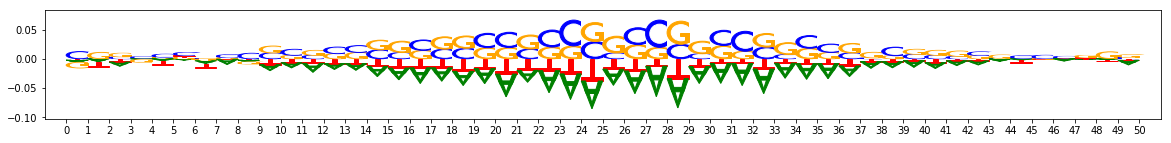

Task 0 actual importance scores:


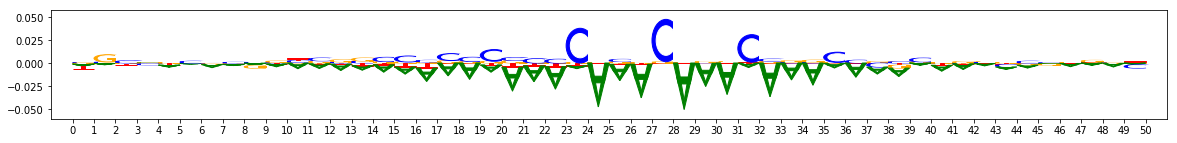

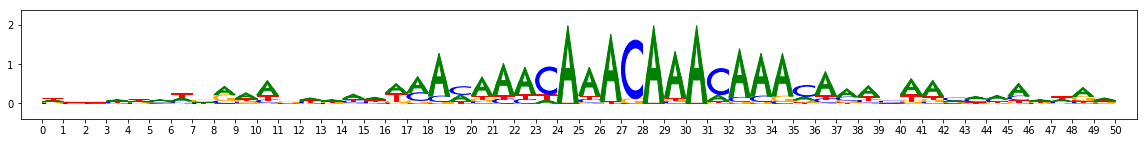

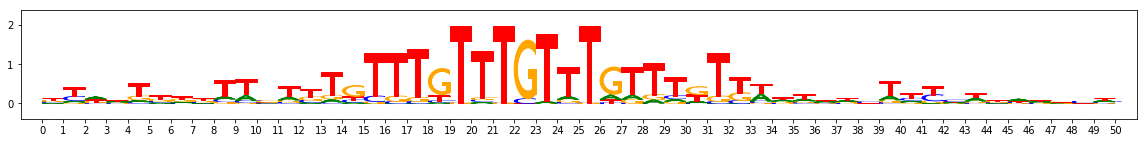

metacluster_1 pattern_11
total seqlets: 24
Task 0 hypothetical scores:


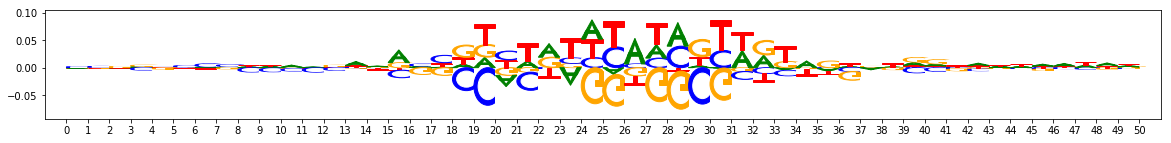

Task 0 actual importance scores:


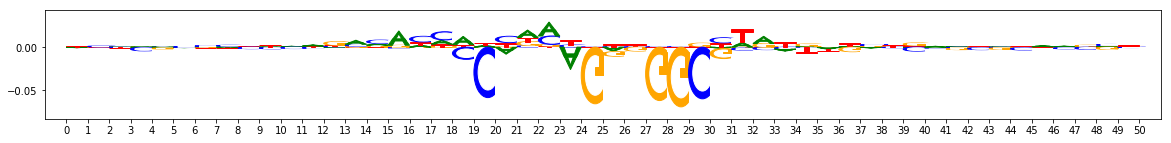

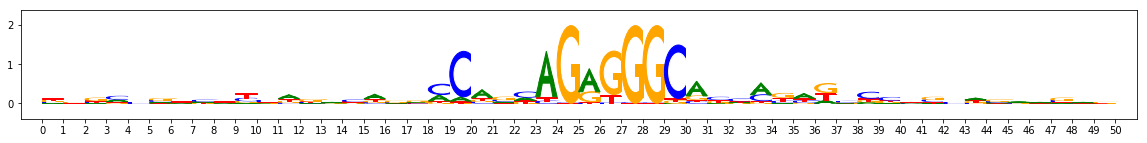

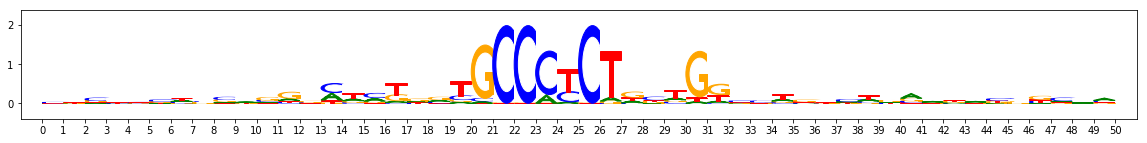

In [2]:
import h5py
import modisco.util
reload(modisco.util)

from collections import Counter
from modisco.visualization import viz_sequence
reload(viz_sequence)
from matplotlib import pyplot as plt

import modisco.affinitymat.core
reload(modisco.affinitymat.core)
import modisco.cluster.phenograph.core
reload(modisco.cluster.phenograph.core)
import modisco.cluster.phenograph.cluster
reload(modisco.cluster.phenograph.cluster)
import modisco.cluster.core
reload(modisco.cluster.core)
import modisco.aggregator
reload(modisco.aggregator)

hdf5_results = h5py.File("CTCFZF4_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

print("Metaclusters heatmap")
import seaborn as sns
activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]
sns.heatmap(activity_patterns, center=0)
plt.show()

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    for pattern_name in all_pattern_names:
        print(metacluster_name, pattern_name)
        all_patterns.append((metacluster_name, pattern_name))
        pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
        print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
        background = np.array([0.29, 0.21, 0.21, 0.29])
        print("Task 0 hypothetical scores:")
        viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["fwd"])
        print("Task 0 actual importance scores:")
        viz_sequence.plot_weights(pattern["task0_contrib_scores"]["fwd"])
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["fwd"]),
                                                        background=background)) 
        viz_sequence.plot_weights(viz_sequence.ic_scale(np.array(pattern["sequence"]["rev"]),
                                                        background=background)) 
        
hdf5_results.close()

metacluster_0
activity pattern: [1]
metacluster_0 pattern_0
total seqlets: 2550
Task 0 hypothetical scores:


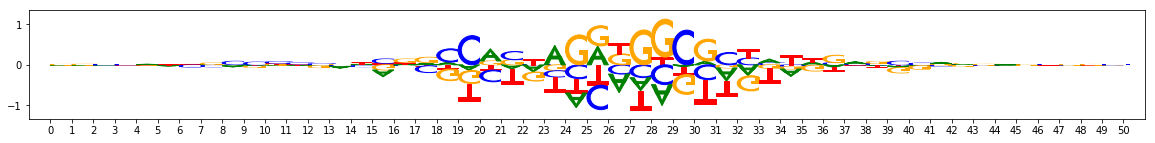

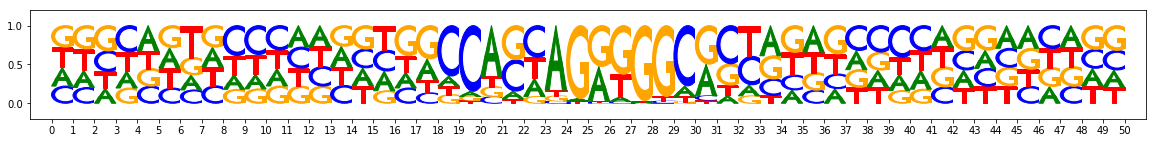

[[ -8.80236163e-03  -3.83468491e-03   9.46841884e-03  -4.90120182e-03]
 [ -9.52057711e-03  -6.26468331e-03   1.26963804e-02   4.09249925e-04]
 [ -4.91035285e-03   6.22721329e-03  -4.45445705e-03  -3.51966831e-03]
 [ -2.87992536e-03   5.41716269e-03  -1.55508593e-03  -5.33833265e-03]
 [  7.39337814e-03   1.29967201e-03   4.05544649e-03  -2.59643106e-03]
 [ -1.36065496e-02  -1.17830516e-02  -3.52169560e-03   1.80005837e-02]
 [ -8.10679551e-03  -4.83487708e-02   9.43370130e-03   1.70000169e-02]
 [ -1.52798181e-02  -3.41949051e-02   3.21554601e-02   1.16688349e-02]
 [ -2.90227539e-02   8.06969587e-02  -2.38858371e-02   6.64592127e-03]
 [ -1.52334941e-02   6.66010829e-02  -2.20688551e-02  -2.16506326e-02]
 [ -1.48034999e-02   3.46628334e-02   1.62863252e-02   2.58499241e-02]
 [ -4.71507431e-03   2.70157375e-02   2.98941828e-03   1.69786905e-02]
 [ -1.61512704e-02   2.80599255e-02  -4.60327247e-02  -6.81116685e-03]
 [ -4.81162760e-02  -1.88881631e-02   6.58714794e-03  -1.87850120e-02]
 [ -2.

In [3]:
# Get the PFM with the most seqlets

hdf5_results = h5py.File("CTCFZF4_actB_vsWT_1000bp_conv3LowFiltTop_TFModiscoResults.h5","r")

activity_patterns = np.array(hdf5_results['metaclustering_results']['attribute_vectors'])[
                    np.array(
        [x[0] for x in sorted(
                enumerate(hdf5_results['metaclustering_results']['metacluster_indices']),
               key=lambda x: x[1])])]

metacluster_names = [
    x.decode("utf-8") for x in 
    list(hdf5_results["metaclustering_results"]
         ["all_metacluster_names"][:])]

all_patterns = []

for metacluster_name in metacluster_names:
    print(metacluster_name)
    metacluster_grp = (hdf5_results["metacluster_idx_to_submetacluster_results"]
                                   [metacluster_name])
    print("activity pattern:",metacluster_grp["activity_pattern"][:])
    all_pattern_names = [x.decode("utf-8") for x in 
                         list(metacluster_grp["seqlets_to_patterns_result"]
                                             ["patterns"]["all_pattern_names"][:])]
    if (len(all_pattern_names)==0):
        print("No motifs found for this activity pattern")
    if metacluster_name != "metacluster_0":
        continue
    pattern_name = all_pattern_names[0]
    print(metacluster_name, pattern_name)
    all_patterns.append((metacluster_name, pattern_name))
    pattern = metacluster_grp["seqlets_to_patterns_result"]["patterns"][pattern_name]
    print("total seqlets:",len(pattern["seqlets_and_alnmts"]["seqlets"]))
    background = np.array([0.29, 0.21, 0.21, 0.29])
    print("Task 0 hypothetical scores:")
    viz_sequence.plot_weights(pattern["task0_hypothetical_contribs"]["rev"])
    viz_sequence.plot_weights(pattern["sequence"]["rev"])
    print(np.array(pattern["task0_hypothetical_contribs"]["rev"]))
    print(np.array(pattern["sequence"]["rev"]))
        
hdf5_results.close()